## TFM:Impacto de la calidad del aire en la salud de las personas en la ciudad de Madrid

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler

In [31]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df=pd.read_excel('data/CMBD_6_20181217-135856.xlsx')

In [3]:
df_calidad_aire_08=pd.read_csv('data/datos08.csv',sep=';')
df_calidad_aire_09=pd.read_csv('data/datos09.csv',sep=';')
df_calidad_aire_10=pd.read_csv('data/datos10.csv',sep=';')
df_calidad_aire_11=pd.read_csv('data/datos11.csv',sep=';')
df_calidad_aire_12=pd.read_csv('data/datos12.csv',sep=';')
df_calidad_aire_13=pd.read_csv('data/datos13.csv',sep=';')
df_calidad_aire_14=pd.read_csv('data/datos14.csv',sep=';')
df_calidad_aire_15=pd.read_csv('data/datos15.csv',sep=';')
df_calidad_aire=[df_calidad_aire_08,df_calidad_aire_09,df_calidad_aire_10,df_calidad_aire_11,df_calidad_aire_12,df_calidad_aire_13,df_calidad_aire_14,df_calidad_aire_15]

## Análisis exploratorio

In [32]:
df.head()

,año,hospital_recodificado,grupo_hospital,grupo_cluster,historia_recodificada,cip_recodificado,fecha_de_nacimiento,sexo,provincia_residencia,régimen_financiación,fecha_de_ingreso,tipo_ingreso,fecha_de_alta,tipo_alta,estancia,diagnóstico_principal,diagnóstico_2,diagnóstico_3,diagnóstico_4,diagnóstico_5,diagnóstico_6,diagnóstico_7,diagnóstico_8,diagnóstico_9,diagnóstico_10,diagnóstico_11,diagnóstico_12,diagnóstico_13,diagnóstico_14,fecha_de_intervención,procedimiento_1,procedimiento_2,procedimiento_3,procedimiento_4,procedimiento_5,procedimiento_6,procedimiento_7,procedimiento_8,procedimiento_9,procedimiento_10,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,tipo_gdr_ap,valor_peso_español,gdr_apr,cdm_apr,tipo_gdr_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste
0,2013,-398345888794880068,4,4,-1687781257578748014,-320943158-171303395,1944-04-10,1,28,1,2013-10-30,1,2013-11-13,1,14,428.0,NaN,276.1,276.8,491.20,494.0,041.85,518.83,401.9,427.31,553.3,V43.4,V15.82,V58.61,NaN,39.96,99.21,93.96,89.39,90.59,91.39,90.42,89.65,87.44,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,2,1,69,1,4441.45
1,2013,-3959599681650518086,3,4,166370745435838543,648485069584850511,1937-06-10,1,28,1,2013-03-19,1,2013-03-25,1,6,491.21,NaN,518.84,519.8,305.1,V15.05,V46.2,600.00,V60.3,V15.82,NaN,NaN,NaN,NaN,NaN,90.42,87.44,87.44,89.52,89.65,89.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541,4,M,0.9407,140,4,M,0.9057,3,3,1,75,0,4550.50
2,2013,-3959599681650518086,3,4,183632305468848809,899288196-1988273609,1923-11-14,1,28,1,2013-11-15,1,2013-11-26,1,11,428.0,NaN,518.84,584.9,516.8,491.22,585.9,416.8,403.90,250.00,427.31,274.9,426.4,600.00,NaN,90.42,87.44,87.44,89.52,89.65,88.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,2.2623,4,4,1,90,0,4441.45
3,2013,-1468647043-245326524,4,5,2877111881585847151,-961279109-1723117644,1956-05-10,2,28,1,2013-04-28,1,2013-05-14,1,16,428.1,NaN,428.20,518.81,491.20,305.1,416.8,276.2,424.2,414.10,NaN,NaN,NaN,NaN,NaN,88.72,87.44,89.37,89.17,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,4,1,56,0,4441.45
4,2013,946141513-1168024764,3,3,17519509571482774643,-33451060035352825,1928-09-07,1,28,1,2013-02-07,2,2013-02-08,1,1,162.5,NaN,496,173.9,600.90,414.8,414.01,250.00,272.0,401.9,V15.82,V45.81,V45.61,V10.83,NaN,33.26,33.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,M,0.9844,136,4,M,0.8844,2,2,1,84,0,4761.87


In [52]:
df.tail()

,año,hospital_recodificado,grupo_hospital,grupo_cluster,historia_recodificada,cip_recodificado,fecha_de_nacimiento,sexo,provincia_residencia,régimen_financiación,fecha_de_ingreso,tipo_ingreso,fecha_de_alta,tipo_alta,estancia,diagnóstico_principal,diagnóstico_2,diagnóstico_3,diagnóstico_4,diagnóstico_5,diagnóstico_6,diagnóstico_7,diagnóstico_8,diagnóstico_9,diagnóstico_10,diagnóstico_11,diagnóstico_12,diagnóstico_13,diagnóstico_14,fecha_de_intervención,procedimiento_1,procedimiento_2,procedimiento_3,procedimiento_4,procedimiento_5,procedimiento_6,procedimiento_7,procedimiento_8,procedimiento_9,procedimiento_10,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,tipo_gdr_ap,valor_peso_español,gdr_apr,cdm_apr,tipo_gdr_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste,mes-año,ingreso_mes_año
140932,2014,-397825696459335749,3,4,15732651961347031435,-148801774-1928770906,1939-11-07,2,28,1,2013-11-23,1,2014-01-07,1,45,491.21,E878.1,519.8,518.84,511.9,786.30,276.1,276.7,415.12,038.9,996.61,250.00,401.9,V45.82,17122013.0,37.87,33.22,99.21,87.41,88.43,88.72,90.52,90.42,87.41,89.65,91.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,0,Q,2.1374,951,0,Q,5.3027,4,4,1,74,1,9760.5,11-2013,11-2013
140933,2014,-3959599681650518086,3,4,1259742565-1684660259,-12521883511529773304,1954-01-09,2,28,1,2013-12-10,1,2014-02-10,4,62,486,NaN,518.81,518.0,511.9,733.13,516.36,276.2,733.00,519.8,V10.11,V15.82,437.0,V46.2,6022014.0,77.49,81.65,33.24,90.42,91.32,88.93,90.52,87.44,33.26,88.01,87.41,89.52,88.72,31.42,18.11,99.23,87.24,93.9,93.18,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,3,1,59,1,10274.5,12-2013,12-2013
140934,2014,6786010821767932736,2,3,82420401566747514,4927991441436875167,1953-10-07,1,28,1,2014-10-31,1,2014-11-18,1,18,486,NaN,510.9,511.89,494.1,491.21,511.9,518.81,799.02,272.4,790.6,275.49,712.30,122.8,7112014.0,34.06,34.04,34.91,87.44,89.52,87.44,89.52,88.74,88.73,99.23,99.21,93.96,93.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,4,1,61,0,10274.5,10-2014,10-2014
140935,2014,-398345888794880068,4,4,-1318909344-1737054105,2075399370-1949447169,1951-04-19,1,28,1,2014-03-03,1,2014-03-15,4,12,481,NaN,518.81,995.91,491.21,511.9,276.2,584.9,518.89,573.8,285.9,305.1,303.91,V12.54,NaN,34.04,34.20,88.43,87.41,90.59,87.44,89.52,93.96,89.66,99.04,89.65,88.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,3,1,62,0,10274.5,03-2014,03-2014
140936,2014,6785908421717601093,4,5,-758230369-639741394,-18336156992074847197,1946-11-05,1,28,1,2014-01-29,1,2014-02-14,1,16,511.81,NaN,518.81,428.0,162.5,196.1,197.2,255.10,584.9,405.99,278.00,496,427.31,276.8,10022014.0,34.92,99.25,34.20,34.91,99.23,93.94,93.96,89.65,88.72,91.39,90.59,89.52,87.44,99.19,99.29,90.49,NaN,NaN,NaN,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,4,1,67,1,10274.5,01-2014,01-2014


In [6]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [7]:
df.año.sort_values().unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [36]:
df.describe(include='all').T

C:\Users\carlo\AppData\Local\Temp/ipykernel_21672/377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T
C:\Users\carlo\AppData\Local\Temp/ipykernel_21672/377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T
C:\Users\carlo\AppData\Local\Temp/ipykernel_21672/377021028.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
año,140937.0,NaN,NaN,NaN,NaT,NaT,2011.504729,2.248531,2008.0,2010.0,2012.0,2013.0,2015.0
hospital_recodificado,140937,34,-398345888794880068,16385,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grupo_hospital,140937.0,NaN,NaN,NaN,NaT,NaT,3.069386,0.963666,1.0,2.0,3.0,4.0,4.0
grupo_cluster,140937.0,NaN,NaN,NaN,NaT,NaT,8.712382,20.757274,1.0,3.0,4.0,5.0,99.0
historia_recodificada,140937,92349,-411355015-1824388255,47,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cip_recodificado,140937,78266,00,21565,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha_de_nacimiento,140937,25596,1949-01-01 00:00:00,70,1900-01-01,2015-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sexo,140937.0,NaN,NaN,NaN,NaT,NaT,1.38564,0.486806,1.0,1.0,1.0,2.0,3.0
provincia_residencia,140937.0,NaN,NaN,NaN,NaT,NaT,28.295345,5.048316,1.0,28.0,28.0,28.0,99.0
régimen_financiación,140937.0,NaN,NaN,NaN,NaT,NaT,1.10819,0.773977,1.0,1.0,1.0,1.0,9.0


In [9]:
comunidad_autonoma=13
provincia=28

In [10]:
df.drop(['comunidad_autónoma','provincia'],axis=1,inplace=True)

In [11]:
df_calidad_aire_08.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2008,1,20.0,V,20.0,...,24.0,V,30.0,V,24.0,V,27.0,V,20.0,V
1,28,79,4,1,28079004_1_38,2008,2,23.0,V,16.0,...,20.0,V,14.0,V,17.0,V,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2008,3,17.0,V,16.0,...,11.0,V,14.0,V,13.0,V,11.0,V,11.0,V
3,28,79,4,1,28079004_1_38,2008,4,14.0,V,11.0,...,9.0,V,7.0,V,6.0,V,7.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2008,5,7.0,V,8.0,...,7.0,V,7.0,V,7.0,V,7.0,V,7.0,V


In [12]:
df.dtypes

año                        int64
hospital_recodificado     object
grupo_hospital             int64
grupo_cluster              int64
historia_recodificada     object
                          ...   
nivel_mortalidad           int64
servicio                  object
edad                       int64
reingreso                  int64
coste                    float64
Length: 64, dtype: object

In [13]:
df_calidad_aire_08.dtypes

PROVINCIA           int64
MUNICIPIO           int64
ESTACION            int64
MAGNITUD            int64
PUNTO_MUESTREO     object
                   ...   
V29                object
D30               float64
V30                object
D31               float64
V31                object
Length: 69, dtype: object

In [14]:
df.shape

(140937, 64)

In [15]:
df_calidad_aire_08.shape

(972, 69)

In [16]:
df_calidad_aire_09.shape

(1049, 69)

In [17]:
df_calidad_aire_10.shape

(1808, 69)

In [18]:
df_calidad_aire_11.shape

(1848, 69)

In [19]:
df_calidad_aire_12.shape

(1830, 69)

In [20]:
df_calidad_aire_13.shape

(1812, 69)

In [21]:
df_calidad_aire_14.shape

(1805, 69)

In [22]:
df_calidad_aire_15.shape

(1812, 69)

In [23]:
df.isnull().mean().sort_values(ascending=False)*100

procedimiento_20         98.493653
procedimiento_19         98.027487
procedimiento_18         97.618085
procedimiento_17         97.168948
procedimiento_16         96.522560
                           ...    
cip_recodificado          0.000000
historia_recodificada     0.000000
grupo_cluster             0.000000
grupo_hospital            0.000000
coste                     0.000000
Length: 64, dtype: float64

In [24]:
df.duplicated().sum()

0

In [25]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values()

servicio                     2
tipo_gdr_ap                  3
tipo_gdr_apr                 3
hospital_recodificado       34
procedimiento_10           313
procedimiento_9            365
procedimiento_8            406
procedimiento_7            439
procedimiento_6            479
procedimiento_4            532
procedimiento_5            536
procedimiento_3            573
procedimiento_2            658
procedimiento_1            758
diagnóstico_2             1603
diagnóstico_14            1628
diagnóstico_principal     1714
diagnóstico_13            1955
diagnóstico_12            2134
diagnóstico_11            2315
diagnóstico_10            2452
diagnóstico_9             2709
diagnóstico_3             2749
diagnóstico_8             2817
diagnóstico_7             2934
diagnóstico_4             2957
diagnóstico_6             3013
diagnóstico_5             3088
cip_recodificado         78266
historia_recodificada    92349
dtype: int64

In [26]:
def vuelta_fecha(x):
    x=str(x)
    if len(x)==8:
        año=x[4:]
        mes=x[2:4]
        dia=x[:2]
        fecha=año+'-'+mes+'-'+dia
    else:
        año=x[3:]
        mes=x[1:3]
        dia=x[:1]
        fecha=año+'-'+mes+'-'+'0'+dia
    return fecha

In [27]:
df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']]=df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']].applymap(lambda x:vuelta_fecha(x))

In [28]:
df.fecha_de_alta=pd.to_datetime(df.fecha_de_alta,format='%Y-%m-%d')
df.fecha_de_nacimiento=pd.to_datetime(df.fecha_de_nacimiento,format='%Y-%m-%d')
df.fecha_de_ingreso=pd.to_datetime(df.fecha_de_ingreso,format='%Y-%m-%d')

In [29]:
df.servicio=LabelEncoder().fit_transform(df.servicio)

In [35]:
df.corr()

,año,grupo_hospital,grupo_cluster,sexo,provincia_residencia,régimen_financiación,tipo_ingreso,tipo_alta,estancia,fecha_de_intervención,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,valor_peso_español,gdr_apr,cdm_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste
año,1.000000,0.019363,-0.005819,0.036342,-1.234734e-02,-0.001493,-0.058603,0.005646,-0.030515,0.006578,-0.105107,-0.028956,-0.100526,-0.164331,-0.208958,-0.209612,-0.221553,-0.217502,-0.177432,-0.158896,0.039462,0.033923,-0.022892,0.026924,2.244747e-02,-0.028704,0.050871,0.092187,0.007022,0.040849,0.041591,0.010191
grupo_hospital,0.019363,1.000000,-0.301435,0.015969,-4.905967e-02,-0.068808,0.038454,0.016891,-0.011666,0.002978,0.035966,0.119615,0.110954,0.112506,0.095499,0.100162,0.066776,0.004459,-0.040507,-0.085293,-0.036817,-0.036807,0.021226,-0.032885,-3.653476e-02,0.035038,0.007164,0.033220,-0.058478,0.133830,0.023672,0.021125
grupo_cluster,-0.005819,-0.301435,1.000000,-0.009408,-4.079736e-03,0.081044,0.184258,-0.001630,-0.000623,0.011092,-0.125887,-0.287455,-0.192254,-0.112981,-0.061638,-0.030144,0.017670,0.095915,0.126068,0.161556,-0.072942,0.095690,-0.038671,0.089833,9.433495e-02,-0.052906,-0.123101,-0.104351,-0.011233,-0.024309,-0.025546,-0.038238
sexo,0.036342,0.015969,-0.009408,1.000000,-8.871797e-04,0.003291,-0.021956,-0.009044,-0.009876,0.012917,0.001096,0.035011,0.020052,0.003072,0.006616,0.018494,-0.011996,0.001127,0.017037,0.036712,-0.037175,0.029107,-0.020847,0.028366,3.155240e-02,-0.032427,-0.045065,-0.056508,-0.060256,-0.032449,-0.056661,-0.019226
provincia_residencia,-0.012347,-0.049060,-0.004080,-0.000887,1.000000e+00,0.022056,-0.015675,-0.000375,0.000313,-0.003388,-0.000835,-0.040026,0.013953,-0.003456,-0.005750,-0.004183,-0.014471,0.025382,0.032629,0.036511,-0.003343,-0.001440,0.001664,-0.002061,9.329766e-07,-0.007404,-0.002409,-0.003226,0.003911,0.015848,-0.004796,-0.000938
régimen_financiación,-0.001493,-0.068808,0.081044,0.003291,2.205576e-02,1.000000,-0.000430,0.010987,0.009893,-0.004505,-0.018531,-0.040319,0.004192,-0.030685,-0.024870,-0.020869,-0.002551,0.026379,0.015064,0.030471,-0.005058,0.005116,0.011053,0.004859,3.551820e-03,0.010742,-0.009307,-0.013302,-0.000706,-0.024833,-0.005496,0.011479
tipo_ingreso,-0.058603,0.038454,0.184258,-0.021956,-1.567461e-02,-0.000430,1.000000,-0.055261,-0.176316,0.052696,-0.046479,-0.107645,-0.042172,-0.056427,-0.046346,-0.049428,-0.016421,0.014175,0.033048,0.075858,-0.224796,0.031898,-0.077084,0.036676,2.874088e-02,-0.111191,-0.329493,-0.299530,-0.023057,-0.132447,-0.035921,-0.076619
tipo_alta,0.005646,0.016891,-0.001630,-0.009044,-3.749949e-04,0.010987,-0.055261,1.000000,0.124386,-0.020074,-0.025353,-0.018564,-0.008937,-0.018097,-0.032264,-0.033070,0.006807,-0.060908,0.028084,-0.036905,0.089880,0.026877,0.080082,0.030302,2.514118e-02,0.132177,0.138261,0.159593,0.015794,0.110591,0.074394,0.079083
estancia,-0.030515,-0.011666,-0.000623,-0.009876,3.130452e-04,0.009893,-0.176316,0.124386,1.000000,0.001639,-0.101951,-0.052130,-0.089891,-0.079313,-0.111804,-0.154641,-0.084788,-0.122413,-0.049988,-0.015590,0.253979,-0.032888,0.532703,0.003686,-2.384552e-02,0.545374,0.312185,0.272019,0.027488,0.118842,0.074027,0.527187
fecha_de_intervención,0.006578,0.002978,0.011092,0.012917,-3.387717e-03,-0.004505,0.052696,-0.020074,0.001639,1.000000,-0.038284,-0.041814,-0.042602,-0.043771,-0.017567,-0.025032,0.040526,-0.006393,-0.008184,0.059316,0.007725,-0.011922,0.014758,-0.010060,-2.121267e-03,0.002699,-0.011590,0.001371,-0.000248,-0.008170,0.012741,0.014243


In [ ]:
df.select_dtypes('number').describe()

,año,grupo_hospital,grupo_cluster,sexo,provincia_residencia,régimen_financiación,tipo_ingreso,tipo_alta,estancia,fecha_de_intervención,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,valor_peso_español,gdr_apr,cdm_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste
count,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,4.998000e+03,12341.000000,7648.000000,4976.000000,7378.000000,6064.000000,4901.000000,3990.000000,3357.000000,2780.000000,2123.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000
mean,2011.504729,3.069386,8.712382,1.385640,28.295345,1.108190,1.229322,1.148045,8.233792,1.601155e+07,89.994133,88.978576,89.173368,90.813866,90.658287,90.871745,90.641140,90.146235,90.557446,91.138337,339.322477,4.462391,0.927574,165.432335,4.482379,1.020586,2.408303,2.166997,0.990265,66.232373,0.129136,4326.082895
std,2.248531,0.963666,20.757274,0.486806,5.048316,0.773977,0.505773,0.709761,10.094767,8.673040e+06,11.674164,13.366136,12.870377,9.212901,9.544991,9.400413,9.454177,9.762235,8.079143,7.419758,240.095403,2.991342,1.166974,128.710834,2.995818,0.947053,0.891282,0.967887,0.098184,17.506537,0.335351,5533.796695
min,2008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.012013e+06,0.120000,0.140000,0.120000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000,3.000000,1.000000,28.000000,1.000000,1.000000,1.000000,3.000000,9.022010e+06,89.390000,88.927500,89.370000,89.170000,89.370000,89.520000,89.520000,89.370000,89.370000,89.520000,88.000000,4.000000,0.634600,136.000000,4.000000,0.607200,2.000000,1.000000,1.000000,57.000000,0.000000,3020.730000
50%,2012.000000,3.000000,4.000000,1.000000,28.000000,1.000000,1.000000,1.000000,6.000000,1.608201e+07,90.490000,90.420000,90.460000,90.410000,90.310000,90.490000,90.420000,90.410000,90.410000,90.590000,539.000000,4.000000,0.830500,140.000000,4.000000,0.905700,3.000000,2.000000,1.000000,70.000000,0.000000,4040.280000
75%,2013.000000,4.000000,5.000000,2.000000,28.000000,1.000000,1.000000,1.000000,10.000000,2.311201e+07,93.960000,93.940000,93.940000,93.960000,93.960000,93.960000,93.940000,92.180000,92.140000,93.940000,541.000000,4.000000,0.949800,141.000000,4.000000,1.047400,3.000000,3.000000,1.000000,79.000000,0.000000,4584.570000
max,2015.000000,4.000000,99.000000,3.000000,99.000000,9.000000,9.000000,9.000000,623.000000,3.112201e+07,99.840000,99.990000,99.910000,99.990000,99.840000,99.940000,99.840000,99.840000,99.840000,99.840000,901.000000,25.000000,23.036400,956.000000,25.000000,17.419400,4.000000,4.000000,1.000000,110.000000,1.000000,116051.540000


In [ ]:
df.grupo_hospital.value_counts(dropna=False)

4    60908
3    38661
2    31607
1     9761
Name: grupo_hospital, dtype: int64

In [ ]:
df.grupo_cluster.value_counts(dropna=False)

4     46866
5     41405
3     26713
2      7183
99     7056
1      5985
6      5729
Name: grupo_cluster, dtype: int64

In [ ]:
df.provincia_residencia.value_counts(dropna=False)

28    137962
99       585
45       359
53       195
19       189
13       170
40       108
10       103
5         91
16        87
6         86
11        68
30        60
24        57
35        56
47        49
50        48
38        46
3         45
18        40
33        33
8         30
2         29
7         28
9         28
37        25
29        24
41        24
36        23
14        23
27        21
46        19
15        19
42        19
4         19
49        18
23        18
39        16
34        15
48        13
51        12
31        12
20        11
32        10
26        10
21         8
12         6
1          5
44         5
17         3
43         3
52         2
22         1
25         1
Name: provincia_residencia, dtype: int64

In [ ]:
df.régimen_financiación.value_counts(dropna=False)

1    137449
3      1518
6       978
9       659
8       252
5        43
4        38
Name: régimen_financiación, dtype: int64

In [ ]:
df.tipo_ingreso.value_counts(dropna=False)

1    110010
2     30728
9       199
Name: tipo_ingreso, dtype: int64

In [ ]:
df.tipo_alta.value_counts(dropna=False)

1    133930
4      4824
2       875
5       557
3       453
9       298
Name: tipo_alta, dtype: int64

<AxesSubplot:xlabel='edad', ylabel='estancia'>

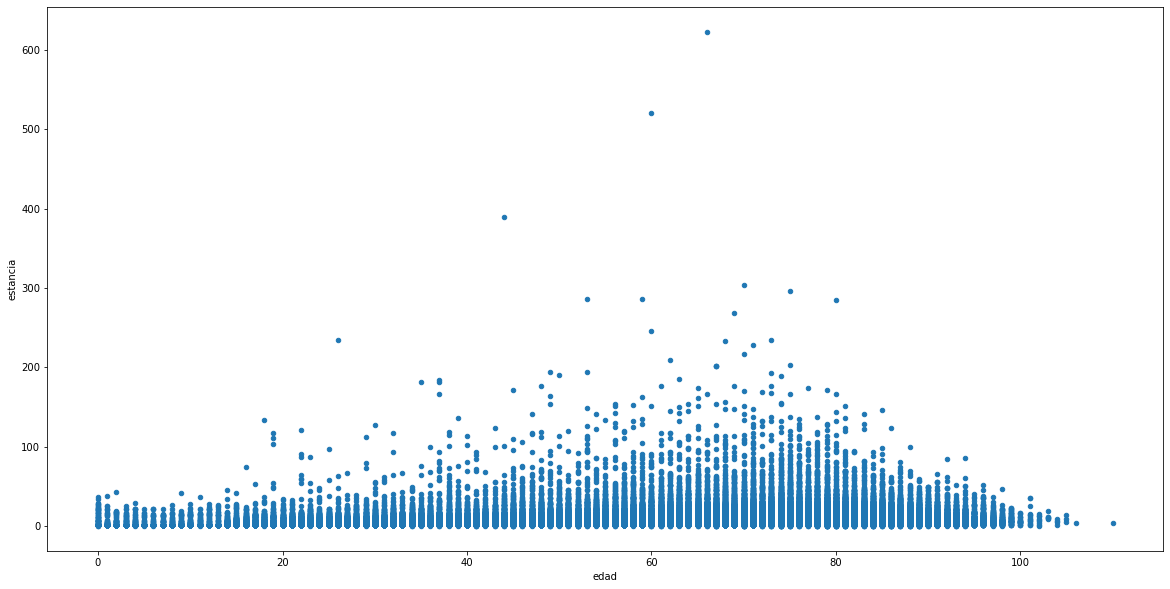

In [ ]:
df.plot(x='edad',y='estancia',kind='scatter',figsize=(20,10))

In [ ]:
df.corr()['edad'].sort_values(ascending=False)

edad                        1.000000
nivel_mortalidad            0.415884
nivel_severidad             0.328792
grupo_hospital              0.133830
gdr_ap                      0.120839
estancia                    0.118842
tipo_alta                   0.110591
valor_peso_americano_apr    0.087202
reingreso                   0.086420
servicio                    0.081427
procedimiento_17            0.053349
año                         0.040849
procedimiento_18            0.037230
procedimiento_16            0.032834
valor_peso_español          0.032685
coste                       0.032284
procedimiento_13            0.028031
procedimiento_11            0.024907
procedimiento_14            0.017342
procedimiento_15            0.016560
procedimiento_19            0.016062
provincia_residencia        0.015848
procedimiento_12            0.008433
fecha_de_intervención      -0.008170
procedimiento_20           -0.016498
grupo_cluster              -0.024309
régimen_financiación       -0.024833
s

In [ ]:
df.corr()['estancia'].sort_values(ascending=False)

estancia                    1.000000
valor_peso_americano_apr    0.545374
valor_peso_español          0.532703
coste                       0.527187
nivel_severidad             0.312185
nivel_mortalidad            0.272019
gdr_ap                      0.253979
tipo_alta                   0.124386
edad                        0.118842
reingreso                   0.074027
servicio                    0.027488
régimen_financiación        0.009893
gdr_apr                     0.003686
fecha_de_intervención       0.001639
provincia_residencia        0.000313
grupo_cluster              -0.000623
sexo                       -0.009876
grupo_hospital             -0.011666
procedimiento_20           -0.015590
cdm_apr                    -0.023846
año                        -0.030515
cdm_ap                     -0.032888
procedimiento_19           -0.049988
procedimiento_12           -0.052130
procedimiento_14           -0.079313
procedimiento_17           -0.084788
procedimiento_13           -0.089891
p

In [ ]:
df.corr()['gdr_ap'].sort_values(ascending=False)

gdr_ap                      1.000000
nivel_severidad             0.676978
nivel_mortalidad            0.646712
valor_peso_americano_apr    0.399210
valor_peso_español          0.332888
coste                       0.328598
estancia                    0.253979
cdm_ap                      0.159002
gdr_apr                     0.155731
cdm_apr                     0.153813
edad                        0.120839
tipo_alta                   0.089880
reingreso                   0.083190
año                         0.039462
fecha_de_intervención       0.007725
provincia_residencia       -0.003343
servicio                   -0.005026
régimen_financiación       -0.005058
procedimiento_12           -0.006233
grupo_hospital             -0.036817
sexo                       -0.037175
procedimiento_13           -0.055188
procedimiento_11           -0.056459
procedimiento_14           -0.060891
procedimiento_20           -0.063929
procedimiento_19           -0.069898
grupo_cluster              -0.072942
p

In [ ]:
df.corr()['cdm_ap'].sort_values(ascending=False)

cdm_ap                      1.000000
cdm_apr                     0.943886
gdr_apr                     0.838653
gdr_ap                      0.159002
grupo_cluster               0.095690
procedimiento_20            0.048702
procedimiento_13            0.038138
año                         0.033923
tipo_ingreso                0.031898
reingreso                   0.031337
sexo                        0.029107
tipo_alta                   0.026877
procedimiento_16            0.021965
procedimiento_14            0.018251
nivel_severidad             0.016366
procedimiento_11            0.016093
procedimiento_12            0.014919
nivel_mortalidad            0.012188
procedimiento_15            0.005761
régimen_financiación        0.005116
procedimiento_18            0.003478
procedimiento_17           -0.000219
provincia_residencia       -0.001440
procedimiento_19           -0.002280
fecha_de_intervención      -0.011922
valor_peso_americano_apr   -0.023994
estancia                   -0.032888
g

In [ ]:
df.corr()['coste'].sort_values(ascending=False)			

coste                       1.000000
valor_peso_español          0.996378
valor_peso_americano_apr    0.800385
estancia                    0.527187
gdr_ap                      0.328598
nivel_severidad             0.240144
nivel_mortalidad            0.215871
tipo_alta                   0.079083
edad                        0.032284
servicio                    0.027178
grupo_hospital              0.021125
reingreso                   0.016368
fecha_de_intervención       0.014243
régimen_financiación        0.011479
año                         0.010191
gdr_apr                     0.002322
provincia_residencia       -0.000938
sexo                       -0.019226
grupo_cluster              -0.038238
cdm_apr                    -0.041377
cdm_ap                     -0.056967
tipo_ingreso               -0.076619
procedimiento_12           -0.079736
procedimiento_13           -0.095565
procedimiento_19           -0.107013
procedimiento_17           -0.107273
procedimiento_14           -0.108115
p

In [ ]:
df.corr()['valor_peso_español'].sort_values(ascending=False)

valor_peso_español          1.000000
coste                       0.996378
valor_peso_americano_apr    0.804885
estancia                    0.532703
gdr_ap                      0.332888
nivel_severidad             0.242389
nivel_mortalidad            0.216155
tipo_alta                   0.080082
edad                        0.032685
servicio                    0.027724
grupo_hospital              0.021226
reingreso                   0.015405
fecha_de_intervención       0.014758
régimen_financiación        0.011053
provincia_residencia        0.001664
gdr_apr                     0.001554
sexo                       -0.020847
año                        -0.022892
grupo_cluster              -0.038671
cdm_apr                    -0.042143
cdm_ap                     -0.058313
procedimiento_12           -0.075800
tipo_ingreso               -0.077084
procedimiento_13           -0.090691
procedimiento_19           -0.098724
procedimiento_17           -0.101713
procedimiento_14           -0.104873
p

In [ ]:
df.corr()['gdr_apr'].sort_values(ascending=False)

gdr_apr                     1.000000
cdm_apr                     0.884498
cdm_ap                      0.838653
gdr_ap                      0.155731
grupo_cluster               0.089833
procedimiento_20            0.040166
tipo_ingreso                0.036676
valor_peso_americano_apr    0.036086
tipo_alta                   0.030302
reingreso                   0.030087
sexo                        0.028366
año                         0.026924
nivel_severidad             0.012775
régimen_financiación        0.004859
procedimiento_14            0.004357
nivel_mortalidad            0.003766
estancia                    0.003686
coste                       0.002322
valor_peso_español          0.001554
procedimiento_16            0.000629
provincia_residencia       -0.002061
fecha_de_intervención      -0.010060
procedimiento_19           -0.011324
procedimiento_12           -0.019294
procedimiento_11           -0.027432
procedimiento_13           -0.029466
procedimiento_17           -0.032651
g

In [ ]:
df.corr()['cdm_apr'].sort_values(ascending=False)

cdm_apr                     1.000000e+00
cdm_ap                      9.438860e-01
gdr_apr                     8.844981e-01
gdr_ap                      1.538129e-01
grupo_cluster               9.433495e-02
procedimiento_20            5.563300e-02
procedimiento_13            3.703523e-02
sexo                        3.155240e-02
tipo_ingreso                2.874088e-02
reingreso                   2.821290e-02
procedimiento_14            2.751933e-02
tipo_alta                   2.514118e-02
año                         2.244747e-02
procedimiento_16            2.200174e-02
nivel_severidad             2.134250e-02
procedimiento_12            1.402871e-02
nivel_mortalidad            1.201913e-02
procedimiento_11            1.003095e-02
procedimiento_15            7.388848e-03
procedimiento_18            5.887476e-03
régimen_financiación        3.551820e-03
provincia_residencia        9.329766e-07
fecha_de_intervención      -2.121267e-03
procedimiento_17           -3.762648e-03
procedimiento_19

In [40]:
df['ingreso_mes_año']=df.fecha_de_ingreso.dt.strftime('%m-%Y')

<AxesSubplot:xlabel='ingreso_mes_año'>

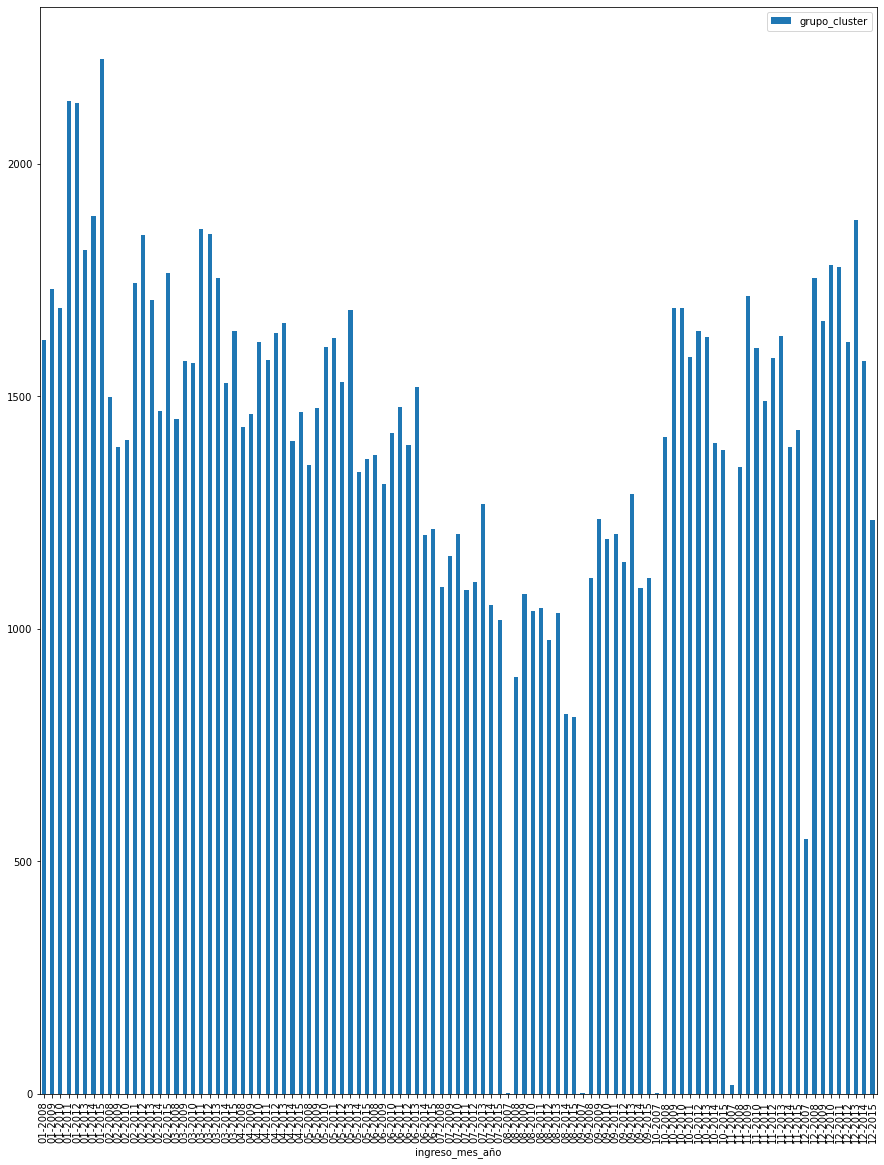

In [45]:
df.groupby('ingreso_mes_año').count().reset_index().plot(x='ingreso_mes_año',y='grupo_cluster',kind='bar',figsize=(15,20))

In [53]:
features=['grupo_cluster','sexo','fecha_de_ingreso','tipo_ingreso','estancia','diagnóstico_principal','procedimiento_1','gdr_ap','cdm_ap','tipo_gdr_ap','valor_peso_español','gdr_apr',	'cdm_apr','tipo_gdr_apr','nivel_severidad',	'nivel_mortalidad',	'servicio','edad','reingreso']

In [54]:
df.groupby('grupo_cluster')['edad'].mean()

grupo_cluster
1     64.916124
2     66.808297
3     64.899749
4     69.350830
5     66.372129
6     48.599057
99    64.591837
Name: edad, dtype: float64